### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


### Prepare Dataset

In [2]:
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.mnist.load_data()

In [3]:
print(xtrain.shape, xtest.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
x_train = xtrain.reshape(60000, -1)/255
x_test = xtest.reshape(10000, -1)/255

In [5]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [6]:
print(ytrain.shape, ytest.shape)
print(ytrain[:4])

(60000,) (10000,)
[5 0 4 1]


In [7]:
with tf.Session() as sess:
    y_train = sess.run(tf.one_hot(ytrain, 10))
    y_test = sess.run(tf.one_hot(ytest, 10))

In [8]:
print(y_train.shape, y_test.shape)
print(y_train[:4])

(60000, 10) (10000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Define Hyperparameters

In [9]:
n_nodes_h1 = 100
n_nodes_h2 = 100
learning_rate = 0.01
epochs = 20
batch_size = 100
n_batches = x_train.shape[0]//batch_size
n_inputs = 784
n_classes = 10

### Build Graph

In [10]:
X = tf.placeholder(tf.float32, [None, n_inputs])
Y = tf.placeholder(tf.float32, [None, n_classes])

np.random.seed(10)

h1_W = tf.Variable(0.1*np.random.randn(n_inputs, n_nodes_h1).astype(np.float32))
h1_B = tf.Variable(0.1*np.random.randn(n_nodes_h1).astype(np.float32))

h2_W = tf.Variable(0.1*np.random.randn(n_nodes_h1, n_nodes_h2).astype(np.float32))
h2_B = tf.Variable(0.1*np.random.randn(n_nodes_h2).astype(np.float32))

output_W = tf.Variable(0.1*np.random.randn(n_nodes_h2, n_classes).astype(np.float32))
output_B = tf.Variable(0.1*np.random.randn(n_classes).astype(np.float32))

l1 = tf.add(tf.matmul(X, h1_W), h1_B)
l1 = tf.nn.relu(l1)

l2 = tf.add(tf.matmul(l1, h2_W), h2_B)
l2 = tf.nn.relu(l2)

pred = tf.nn.softmax(tf.add(tf.matmul(l2, output_W), output_B))

In [18]:
1e-4

0.0001

In [12]:
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(pred+1e-4), axis=1))

opt1 = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
opt2 = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9, use_nesterov=True).minimize(cost)
opt3 = tf.train.RMSPropOptimizer(learning_rate=learning_rate, momentum=0.9).minimize(cost)
opt4 = tf.train.AdamOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
correct_pred = tf.equal(tf.argmax(pred, 1),tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Run Graph : GD Optimizer

Training with GD optimizer....
Epoch: 0 Loss: 718.9398189038038 Accuracy:0.8303666710853577
Epoch: 5 Loss: 179.34483744576573 Accuracy:0.9151166677474976
Epoch: 10 Loss: 139.83389274962246 Accuracy:0.9340500235557556
Epoch: 15 Loss: 116.06033872254193 Accuracy:0.9447333216667175
Training Finished!

Testing Accuracy:  0.9474


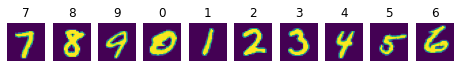

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("Training with GD optimizer....")
    loss_sgd = np.zeros(epochs)
    for epoch in range(epochs):
        j = 1
        epoch_loss = 0
        for i in range(n_batches):
            offset = i*batch_size
            x = x_train[offset:batch_size*j]
            y = y_train[offset:batch_size*j]
            
            _, c = sess.run([opt1, cost], {X:x, Y:y})
            epoch_loss += c
            j+=1
        loss_sgd[epoch] = epoch_loss
        if epoch%5==0:
            acc = sess.run(accuracy, {X:x_train, Y:y_train})
            print("Epoch: {} Loss: {} Accuracy:{}".format(epoch, epoch_loss, acc))
    print("Training Finished!\n")
    
    print("Testing Accuracy: ", sess.run(accuracy, {X:x_test, Y:y_test}))
    fig, axes = plt.subplots(1,10, figsize=(8,4))
    
    for img, ax in zip(x_test[-10:], axes):
        guess = np.argmax(sess.run(pred, {X:[img]}))
        ax.set_title(guess)
        ax.imshow(img.reshape(28,28))
        ax.axis("off")

### GD + Momentum Optimizer...

Training with GD + Momentum optimizer....
Epoch: 0 Loss: 282.77285029925406 Accuracy:0.9239000082015991
Epoch: 5 Loss: 57.559453296940774 Accuracy:0.9747333526611328
Epoch: 10 Loss: 31.57832647114992 Accuracy:0.9831333160400391
Epoch: 15 Loss: 19.240094192849938 Accuracy:0.9876166582107544
Training Finished!

Testing Accuracy:  0.9722


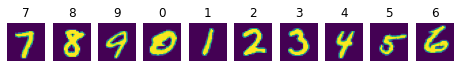

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("Training with GD + Momentum optimizer....")
    loss_momentum = np.zeros(epochs)
    for epoch in range(epochs):
        j = 1
        epoch_loss = 0
        for i in range(n_batches):
            offset = i*batch_size
            x = x_train[offset:batch_size*j]
            y = y_train[offset:batch_size*j]
            
            _, c = sess.run([opt2, cost], {X:x, Y:y})
            epoch_loss += c
            j+=1
        loss_momentum[epoch] = epoch_loss
        if epoch%5==0:
            acc = sess.run(accuracy, {X:x_train, Y:y_train})
            print("Epoch: {} Loss: {} Accuracy:{}".format(epoch, epoch_loss, acc))
    print("Training Finished!\n")
    
    print("Testing Accuracy: ", sess.run(accuracy, {X:x_test, Y:y_test}))
    fig, axes = plt.subplots(1,10, figsize=(8,4))
    
    for img, ax in zip(x_test[-10:], axes):
        guess = np.argmax(sess.run(pred, {X:[img]}))
        ax.set_title(guess)
        ax.imshow(img.reshape(28,28))
        ax.axis("off")

### RMSProp Optimizer...

Training with RMSProp optimizer....
Epoch: 0 Loss: 2320.5906794518232 Accuracy:0.36758333444595337
Epoch: 5 Loss: 2375.5465755462646 Accuracy:0.5871833562850952
Epoch: 10 Loss: 1842.0632135868073 Accuracy:0.6582333445549011
Epoch: 15 Loss: 1851.611604809761 Accuracy:0.6665833592414856
Training Finished!

Testing Accuracy:  0.7089


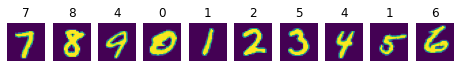

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("Training with RMSProp optimizer....")
    loss_rms = np.zeros(epochs)
    for epoch in range(epochs):
        j = 1
        epoch_loss = 0
        for i in range(n_batches):
            offset = i*batch_size
            x = x_train[offset:batch_size*j]
            y = y_train[offset:batch_size*j]
            
            _, c = sess.run([opt3, cost], {X:x, Y:y})
            epoch_loss += c
            j+=1
        loss_rms[epoch] = epoch_loss
        if epoch%5==0:
            acc = sess.run(accuracy, {X:x_train, Y:y_train})
            print("Epoch: {} Loss: {} Accuracy:{}".format(epoch, epoch_loss, acc))
    print("Training Finished!\n")
    
    print("Testing Accuracy: ", sess.run(accuracy, {X:x_test, Y:y_test}))
    fig, axes = plt.subplots(1,10, figsize=(8,4))
    
    for img, ax in zip(x_test[-10:], axes):
        guess = np.argmax(sess.run(pred, {X:[img]}))
        ax.set_title(guess)
        ax.imshow(img.reshape(28,28))
        ax.axis("off")

### Adam Optimizer...

Training with Adam optimizer....
Epoch: 0 Loss: 155.4133755369112 Accuracy:0.9543166756629944
Epoch: 5 Loss: 64.02071360826449 Accuracy:0.9768833518028259
Epoch: 10 Loss: 53.382462643148756 Accuracy:0.9807000160217285
Epoch: 15 Loss: 43.274506805259776 Accuracy:0.9837333559989929
Training Finished!

Testing Accuracy:  0.9676


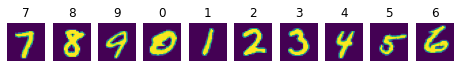

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("Training with Adam optimizer....")
    loss_adam = np.zeros(epochs)
    for epoch in range(epochs):
        j = 1
        epoch_loss = 0
        for i in range(n_batches):
            offset = i*batch_size
            x = x_train[offset:batch_size*j]
            y = y_train[offset:batch_size*j]
            
            _, c = sess.run([opt4, cost], {X:x, Y:y})
            epoch_loss += c
            j+=1
        loss_adam[epoch] = epoch_loss
        if epoch%5==0:
            acc = sess.run(accuracy, {X:x_train, Y:y_train})
            print("Epoch: {} Loss: {} Accuracy:{}".format(epoch, epoch_loss, acc))
    print("Training Finished!\n")
    
    print("Testing Accuracy: ", sess.run(accuracy, {X:x_test, Y:y_test}))
    fig, axes = plt.subplots(1,10, figsize=(8,4))
    
    for img, ax in zip(x_test[-10:], axes):
        guess = np.argmax(sess.run(pred, {X:[img]}))
        ax.set_title(guess)
        ax.imshow(img.reshape(28,28))
        ax.axis("off")

### Evaluate Results

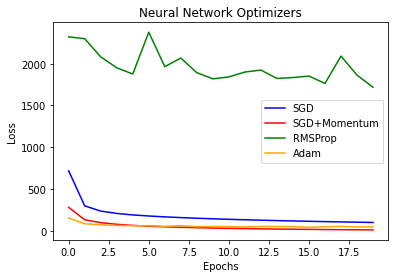

In [20]:
plt.figure()
plt.plot(loss_sgd, color="blue", label="SGD")
plt.plot(loss_momentum, color="red", label="SGD+Momentum")
plt.plot(loss_rms, color="green", label="RMSProp")
plt.plot(loss_adam, color="orange", label="Adam")
plt.title("Neural Network Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()